# Reading Multi Spectral Images

https://nbviewer.jupyter.org/github/thomasaarholt/hyperspy-demos/blob/master/2_SVD_and_BSS.ipynb


## Multispectral Imagery
Images obtained with a ADC Lite - Tetracam's Lightweight ADC

I made pitures about: 

>Aluminum , Copper, Brass, Iron, Stainless Steel, Painted Iron 

http://tetracam.com/Products-ADC_Lite.htm

MRobalinho - 18-04-2019

## Add Libraries

In [1]:
# Add libraries
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image, ImageFilter, ImageOps
from openpyxl import load_workbook

In [2]:
# Verify my current folder
currDir = os.path.dirname(os.path.realpath("__file__"))
mypath = currDir
print(currDir)  

C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook


In [3]:
# Path to the image files
folder = "Test_image02"
path = currDir + "/" + folder + "/"

# Part name of file to filter files
end_file = ".jpg"

## Read images from folder

In [5]:
# Read files from folder
print(path)
print('-')
print(' ---- IMAGES ON THE FOLDER :', folder, '------- *', end_file)

for file in os.listdir(path):
    if file.endswith(end_file):
        print(os.path.join(file))
print('-')        

C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/Test_image02/
-
 ---- IMAGES ON THE FOLDER : Test_image02 ------- * .jpg
Copper_1.jpg
-


In [6]:
# Create Data Frame with image information
df_image = []

## Functions to the work

In [7]:
# Look from an chanel from then image

def channel(img, n):
    """Isolate the nth channel from the image.

       n = 0: red, 1: green, 2: blue
    """
    a = np.array(img)
    a[:,:,(n!=0, n!=1, n!=2)] *= 0
#   a[:,:,n] *= 0
#   print(Image.fromarray(a), 'Get Channel n: ', n)

    print('Get Channel n: ', n)
    return Image.fromarray(a)

# def to resize 
# Given parameters : image , number to divide (resize)
def imageResize(img, n):
    width, height = img.size 

    print('Original size:', width, '/', height, 'Resize:',n)
    
    newWidth = int(width / n)
    newHeight = int(height / n)
    img.resize((newWidth, newHeight), Image.ANTIALIAS)
    print('New size:', newWidth, '/', newHeight)
    return img

In [8]:
# Obtain main color from image
# https://convertingcolors.com/rgb-color-169_171_170.html
    
def get_main_color(path, file):
    img = Image.open(path+file)
    colors = img.getcolors( 1024*1024) #put a higher value if there are many colors in your image
    print('Get main Color file:', file)
    max_occurence, most_present = 0, 0
    try:
        for c in colors:
            if c[0] > max_occurence:
                (max_occurence, most_present) = c
        return most_present
    except TypeError:
        raise Exception("Too many colors in the image")

In [9]:
#!/usr/bin/python

# Return one 24-bit color value 
def rgbToDecimal(x_rgb):
    r,g,b = rgbToRGB(x_rgb)
    rgb_dec = (r << 16) + (g << 8) + b
    #print('RGB Color:', x_rgb, '   Dec:', rgb_dec)
    return rgb_dec

# Convert 24-bit color value to RGB
def colorToRGB(c):
    r = c >> 16
    c -= r * 65536;
    g = c / 256
    c -= g * 256;
    b = c
    return [r, g, b]

def rgbToRGB(x_rgb):
    x_rgb = list(x_rgb)
    r = x_rgb[0]
    g = x_rgb[1]
    b = x_rgb[2]

    print(x_rgb, r,g,b)
    return r, g, b

def getRGBfromI(RGBint):
    blue =  RGBint & 255
    green = (RGBint >> 8) & 255
    red =   (RGBint >> 16) & 255
    return red, green, blue

def getIfromRGB(rgb):
    red = rgb[0]
    green = rgb[1]
    blue = rgb[2]
    print(red, green, blue)
    RGBint = (red<<16) + (green<<8) + blue
    return RGBint

# RGB to Hex Decimal
def rgb_to_hex(rgb):
    rgb_int = bytes(rgb).hex()
    rgb_dec = '#'+str(rgb_int)
    #print('RGB :',rgb, '  Hex Dec:', rgb_dec)
    return rgb_dec

x_rgb = (254, 250, 255)
#rgb_hex = rgb_to_hex(x_rgb)
rgb_dec = rgbToDecimal(x_rgb)

[254, 250, 255] 254 250 255
RGB Color: (254, 250, 255)    Dec: 16710399


In [10]:
# https://github.com/conda-forge/webcolors-feedstock
# conda config --add channels conda-forge
# conda install webcolors
# It is possible to list all of the versions of webcolors available on your platform with:
#       conda search webcolors --channel conda-forge

# COLOR NAME
import webcolors
def get_color_name(rgb_x):
    min_colours = {}
    for key, name in webcolors.css21_hex_to_names.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - rgb_x[0]) ** 2
        gd = (g_c - rgb_x[1]) ** 2
        bd = (b_c - rgb_x[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    print('Color name from RGB:',rgb_x,'  is :',min_colours[min(min_colours.keys())])
    return min_colours[min(min_colours.keys())]

In [11]:
# Get color name from RGB
# https://stackoverflow.com/questions/2453344/find-the-colour-name-from-a-hexadecimal-colour-code

colorof = {'#F0F8FF':"aliceblue",
'#FAEBD7':"antiquewhite",
'#00FFFF':"aqua",
'#7FFFD4':"aquamarine",
'#F0FFFF':"azure",
'#F5F5DC':"beige",
'#FFE4C4':"bisque",
'#000000':"black",
'#FFEBCD':"blanchedalmond",
'#0000FF':"blue",
'#8A2BE2':"blueviolet",
'#A52A2A':"brown",
'#DEB887':"burlywood",
'#5F9EA0':"cadetblue",
'#7FFF00':"chartreuse",
'#D2691E':"chocolate",
'#FF7F50':"coral",
'#6495ED':"cornflowerblue",
'#FFF8DC':"cornsilk",
'#DC143C':"crimson",
'#00FFFF':"cyan",
'#00008B':"darkblue",
'#008B8B':"darkcyan",
'#B8860B':"darkgoldenrod",
'#A9A9A9':"darkgray",
'#006400':"darkgreen",
'#BDB76B':"darkkhaki",
'#8B008B':"darkmagenta",
'#556B2F':"darkolivegreen",
'#FF8C00':"darkorange",
'#9932CC':"darkorchid",
'#8B0000':"darkred",
'#E9967A':"darksalmon",
'#8FBC8B':"darkseagreen",
'#483D8B':"darkslateblue",
'#2F4F4F':"darkslategray",
'#00CED1':"darkturquoise",
'#9400D3':"darkviolet",
'#FF1493':"deeppink",
'#00BFFF':"deepskyblue",
'#696969':"dimgray",
'#1E90FF':"dodgerblue",
'#B22222':"firebrick",
'#FFFAF0':"floralwhite",
'#228B22':"forestgreen",
'#FF00FF':"fuchsia",
'#DCDCDC':"gainsboro",
'#F8F8FF':"ghostwhite",
'#FFD700':"gold",
'#DAA520':"goldenrod",
'#808080':"gray",
'#008000':"green",
'#ADFF2F':"greenyellow",
'#F0FFF0':"honeydew",
'#FF69B4':"hotpink",
'#CD5C5C':"indianred",
'#4B0082':"indigo",
'#FFFFF0':"ivory",
'#F0E68C':"khaki",
'#E6E6FA':"lavender",
'#FFF0F5':"lavenderblush",
'#7CFC00':"lawngreen",
'#FFFACD':"lemonchiffon",
'#ADD8E6':"lightblue",
'#F08080':"lightcoral",
'#E0FFFF':"lightcyan",
'#FAFAD2':"lightgoldenrodyellow",
'#D3D3D3':"lightgray",
'#90EE90':"lightgreen",
'#FFB6C1':"lightpink",
'#FFA07A':"lightsalmon",
'#20B2AA':"lightseagreen",
'#87CEFA':"lightskyblue",
'#778899':"lightslategray",
'#B0C4DE':"lightsteelblue",
'#FFFFE0':"lightyellow",
'#00FF00':"lime",
'#32CD32':"limegreen",
'#FAF0E6':"linen",
'#FF00FF':"magenta",
'#800000':"maroon",
'#66CDAA':"mediumaquamarine",
'#0000CD':"mediumblue",
'#BA55D3':"mediumorchid",
'#9370DB':"mediumpurple",
'#3CB371':"mediumseagreen",
'#7B68EE':"mediumslateblue",
'#00FA9A':"mediumspringgreen",
'#48D1CC':"mediumturquoise",
'#C71585':"mediumvioletred",
'#191970':"midnightblue",
'#F5FFFA':"mintcream",
'#FFE4E1':"mistyrose",
'#FFE4B5':"moccasin",
'#FFDEAD':"navajowhite",
'#000080':"navy",
'#FDF5E6':"oldlace",
'#808000':"olive",
'#6B8E23':"olivedrab",
'#FFA500':"orange",
'#FF4500':"orangered",
'#DA70D6':"orchid",
'#EEE8AA':"palegoldenrod",
'#98FB98':"palegreen",
'#AFEEEE':"paleturquoise",
'#DB7093':"palevioletred",
'#FFEFD5':"papayawhip",
'#FFDAB9':"peachpuff",
'#CD853F':"peru",
'#FFC0CB':"pink",
'#DDA0DD':"plum",
'#B0E0E6':"powderblue",
'#800080':"purple",
'#FF0000':"red",
'#BC8F8F':"rosybrown",
'#4169E1':"royalblue",
'#8B4513':"saddlebrown",
'#FA8072':"salmon",
'#F4A460':"sandybrown",
'#2E8B57':"seagreen",
'#FFF5EE':"seashell",
'#A0522D':"sienna",
'#C0C0C0':"silver",
'#87CEEB':"skyblue",
'#6A5ACD':"slateblue",
'#708090':"slategray",
'#FFFAFA':"snow",
'#00FF7F':"springgreen",
'#4682B4':"steelblue",
'#D2B48C':"tan",
'#008080':"teal",
'#D8BFD8':"thistle",
'#FF6347':"tomato",
'#40E0D0':"turquoise",
'#EE82EE':"violet",
'#F5DEB3':"wheat",
'#FFFFFF':"white",
'#F5F5F5':"whitesmoke",
'#FFFF00':"yellow",
'#9ACD32':"yellowgreen"}


def get_rgb_color_name(rgb):
    
    hex_from_rgb = rgb_to_hex(rgb)  # transform RGB into hexadecimal
    hx = hex_from_rgb[1:8]
    #print(hx)
    # if color is found in dict
    if colorof.get(hx):return colorof[hx]

    # else return its closest available color
    m = 16777215
    k = '000000'
    for key in colorof.keys():
        key_color = key[1:8]
        #print(key_color)
        a = int(hx[:2],16)-int(key_color[:2],16)
        b = int(hx[2:4],16)-int(key_color[2:4],16)
        c = int(hx[4:],16)-int(key_color[4:],16)

        v = a*a+b*b+c*c # simple measure for distance between colors

        # v = (r1 - r2)^2 + (g1 - g2)^2 + (b1 - b2)^2

        if v <= m:
            m = v
            k = key

    return colorof[k], hex_from_rgb

rgb_1 = (216, 220, 223)
cname, hexdc = get_rgb_color_name(rgb_1)
print('Found:',    cname, '  Hex:', hexdc)     # found in dict

Found: gainsboro   Hex: #d8dcdf


In [12]:
# Increase the contrast image
# im - image
# xvalue = contrast value
# https://pillow.readthedocs.io/en/4.0.x/reference/ImageEnhance.html
from PIL import ImageEnhance
# Path + file name + numeric value to enhancement

def contrast(path, xfile, xvalue):
    print('   Enhance image:', xfile, '  Value:', xvalue)
    file1 = path + xfile
    im = read_pil_image(file1)
    
    enh = ImageEnhance.Contrast(im)
    # enh.enhance(1.0).show("30% more contrast")
    x_enh = enh.enhance(xvalue)
     # Create name file masked
    f2_file = 'Enh_' + xfile
    print('   Save enhanced file :', f2_file)
    x_enh.save(f2_file)  # save enhanced file
    return x_enh, f2_file

In [13]:
# Contour image and background
import cv2
def remove_background_image(fname):
    # Read with cv2
    img = cv2.imread(fname)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    v = hsv[:,:,2]
    th, threshed = cv2.threshold(v, 100, 255, cv2.THRESH_OTSU|cv2.THRESH_BINARY_INV)
    threshed[-1] = 255

    cnts = cv2.findContours(threshed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[-2]

    mask = np.zeros_like(threshed)
    cv2.drawContours(mask, cnts, -1, (255, 0, 0), -1, cv2.LINE_AA)
    mask = cv2.erode(mask, np.ones((3,3), np.int32), iterations=1)
    
    # image BGR
    png_bgr     = np.dstack((img, mask))
  
    png_inv = np.dstack((mask, img))
    # image RGB
    png = cv2.cvtColor(png_bgr, cv2.COLOR_BGR2RGB)
    
    return(png, mask, png_inv)

In [14]:
# Return RGB separately
def return_rgb_from_RGB(rgb):
    p_rgb = list(rgb)
    red   = p_rgb[0]
    green = p_rgb[1]
    blue  = p_rgb[2]
    return red, green, blue

In [15]:
# Return distance from 2 colors

# http://hanzratech.in/2015/01/16/color-difference-between-2-colors-using-python.html
# https://python-colormath.readthedocs.io/en/latest/delta_e.html#delta-e-cie-2000

from colormath.color_objects import sRGBColor, LabColor
from colormath.color_conversions import convert_color
from colormath.color_diff import delta_e_cie2000

def delta_2_colors(rgb_1, rgb_2):
    #print('   Delta colors: ', rgb_1, rgb_2)
    #---- first color
    xr, xg, xb = return_rgb_from_RGB(rgb_1)
    # Red Color
    color1_rgb = sRGBColor(xr, xg, xb)

    #--- other color
    rgb_1 = rgb_2
    xr, xg, xb = return_rgb_from_RGB(rgb_1)
    # Blue Color
    color2_rgb = sRGBColor(xr, xg, xb)

    # Convert from RGB to Lab Color Space
    color1_lab = convert_color(color1_rgb, LabColor)

    # Convert from RGB to Lab Color Space
    color2_lab = convert_color(color2_rgb, LabColor)

    # Find the color difference
    delta_e = delta_e_cie2000(color1_lab, color2_lab)

    #print("      The difference between the 2 color = ", delta_e)
    return delta_e

In [16]:
# Remove Background - Put red background
#https://stackoverflow.com/questions/29313667/how-do-i-remove-the-background-from-this-kind-of-image
    
import cv2
import numpy as np

def red_background(path, xfile):
    print('   Red background for image:', xfile)
    #== Parameters =======================================================================
    BLUR = 21
    CANNY_THRESH_1 = 10
    CANNY_THRESH_2 = 200
    MASK_DILATE_ITER = 10
    MASK_ERODE_ITER = 10
    MASK_COLOR = (0.0,0.0,1.0) # In BGR format

    #== Processing =======================================================================
    file1 = path + xfile
    #-- Read image -----------------------------------------------------------------------
    img = cv2.imread(file1)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    #-- Edge detection -------------------------------------------------------------------
    edges = cv2.Canny(gray, CANNY_THRESH_1, CANNY_THRESH_2)
    edges = cv2.dilate(edges, None)
    edges = cv2.erode(edges, None)

    #-- Find contours in edges, sort by area ---------------------------------------------
    contour_info = []
    _, contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    # Previously, for a previous version of cv2, this line was: 
    #  contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    # Thanks to notes from commenters, I've updated the code but left this note
    for c in contours:
        contour_info.append((
            c,
            cv2.isContourConvex(c),
            cv2.contourArea(c),
        ))
    contour_info = sorted(contour_info, key=lambda c: c[2], reverse=True)
    max_contour = contour_info[0]

    #-- Create empty mask, draw filled polygon on it corresponding to largest contour ----
    # Mask is black, polygon is white
    mask = np.zeros(edges.shape)
    cv2.fillConvexPoly(mask, max_contour[0], (255))

    #-- Smooth mask, then blur it --------------------------------------------------------
    mask = cv2.dilate(mask, None, iterations=MASK_DILATE_ITER)
    mask = cv2.erode(mask, None, iterations=MASK_ERODE_ITER)
    mask = cv2.GaussianBlur(mask, (BLUR, BLUR), 0)
    mask_stack = np.dstack([mask]*3)    # Create 3-channel alpha mask

    #-- Blend masked img into MASK_COLOR background --------------------------------------
    mask_stack  = mask_stack.astype('float32') / 255.0          # Use float matrices, 
    img         = img.astype('float32') / 255.0                 #  for easy blending

    masked = (mask_stack * img) + ((1-mask_stack) * MASK_COLOR) # Blend
    masked = (masked * 255).astype('uint8')                     # Convert back to 8-bit 
    
    # Create name file masked
    f2_file = 'Mask_'+ xfile
    file2 = get_image_folder(f2_file)
    
    # Write masked image on disk
    print('   Save masked image with red background:', f2_file)
    cv2.imwrite(file2, masked)           # Save
    # Return name file masked and image masked
    return f2_file, masked


In [17]:
# https://convertingcolors.com/rgb-color-169_171_170.html

# return most_present RGB, RGB, color name, list RGB colors without RED, list RGB colors without back

import collections

def get_main_color_without_red_and_floor(path, f2_file):
    print('    Main color from image:', f2_file)
    img = Image.open(path+f2_file)
    colors = img.getcolors( 1024*1024) #put a higher value if there are many colors in your image
    #-----
    # --- Obtain RGB red and decimal RGB red
    rgb_red = (254, 0, 0)   # Configure red color

    # --- Obtain RGB Background and decimal RGB Backgroundred
    rgb_back = (216, 220, 223)  # Configure background color

    #-----
    # Create list with colors without RED color (near red color)
    list_non_red = list()
    #-----
    # Create list with colors without Background color (near Background color)
    list_non_back = list()
    list_dec_back = list()   # List from decimal colors to list_non_back
    #
    print('List without red color', rgb_red)
    # Convert list to decimal color
    for color in colors:
        # Diference between colors
       # print(color[1])
        rgb = color[1]
        exclude_color = False   # Mark excluded register
        zz = 0
        zz = delta_2_colors(rgb_red, rgb)
        # create new list whithout nead Red color (+- 50)    
        if zz > 50:
            list_non_red.append(rgb) 
    #        print('OK Color RED:',rgb_red,'   other color:',rgb, '  Dif Color:',zz)
    #    else:
    #        print('NO Color:',rgb_red,'   other color:',rgb, '  Dif Color:',zz)


    #-----
    # Convert list to decimal color and with out background color
    print('List without background color',rgb_back)
    for color in list_non_red:
        rgb = color
        # Diference between colors
        zz = 0
        zz = delta_2_colors(rgb_back, rgb)
        # create new list whithout nead Background color (+- 150)    
        if zz > 120:
            list_non_back.append(rgb) 
            
            # Decimal color
            rgb_dec    = rgbToDecimal(rgb)
            list_dec_back.append(rgb_dec) 
            #print('OK Color BK:',rgb_back,'   other color:',rgb, '  Dif Color:',zz)
    #    else:
         #  print('NO Color:',rgb_red,'   other color:',rgb, '  Dif Color:',zz)

    #-----
    print('Count ocurrencies for color')
    most_present = 0

    # Most common color in the list
    
    x = collections.Counter(list_non_back)
    print('      5 Most common colors:', x.most_common(5))  # Five most common colors
    most_present = x.most_common(1)
    xrgb = list_non_back[0] # common color
    
    # ----- color name --
    #xt_color_name = get_color_name(xrgb)
    print('      Read color name:', xrgb)  # Color name from RGB
    xt_color_name , hexdc = get_rgb_color_name(xrgb)
    print('      Main Color file:', f2_file, ' RGB:', most_present, xrgb, '   Color name:', xt_color_name,' Hex:',hexdc)
    return most_present, xrgb, xt_color_name, list_non_red, list_non_back, list_dec_back


In [18]:
# Read image with PIL
from PIL import Image, ImageFilter, ImageOps
def read_pil_image(file1):
    print('Reading image:', file1)
    try:
        original = Image.open(file1)
    except:
        print ("Unable to load image")
    return original

In [19]:
# Read image folder
import glob, os
def get_image_folder(xfile1):
 
    # Path to the image files
    path = currDir + "/" + folder + "/"
    # File
    file1 = path + xfile1
    print(file1)
    return file1

In [20]:
# Print all the informations from image, and create a pandas data frame with the relevant information

def print_file(path, xfile):
    print('------------------------------------------------------------------------')   
    tif_f1 = Image.open(path+xfile)

    print('Inf.File:',xfile)

    # Transform Image to array
    aArray = np.array(tif_f1)
    # Array sum  
    xsum = aArray.sum() / 1000000
    
    # Get channel 0
    x0_channel = channel(tif_f1, 0)
    aArray = np.array(x0_channel)
    xsum_0 = aArray.sum() / 1000000  

    # Get channel 1
    x1_channel = channel(tif_f1, 1)
    aArray = np.array(x1_channel)
    xsum_1 = aArray.sum() / 1000000  

    # Get channel 2
    x2_channel = channel(tif_f1, 2)
    aArray = np.array(x2_channel)
    xsum_2 = aArray.sum() / 1000000  

    # Histogram from image
    aHist = tif_f1.histogram()
    hsum = sum(aHist) / 100000

    # Histogram channel 0
    aHist_0 = x0_channel.histogram()
    hsum_0 = sum(aHist_0) / 100000

    # Histogram channel 1
    aHist_1 = x1_channel.histogram()
    hsum_1 = sum(aHist_1) / 100000

    # Histogram chanel 0
    aHist_2 = x2_channel.histogram()
    hsum_2 = sum(aHist_2) / 100000

    # number elements on list
    nlist = len(aHist)

    # Get color
    # Enhancement Contrast color for better definition
    # f1_file has the file name saved enhanced  
    xvalue = 2.0  
    print('Enhancement color:', xfile, '  Value:',xvalue)  
    x_enh, f1_file = contrast(path, xfile, xvalue)

    # Remove Background - Put red background
    # f2_file has the file name saved masked
    file1 = path+f1_file  
    print('Red background:', path, f1_file)   
    f2_file, img_masked = red_background(path, f1_file)

    # Get Main Color - 
    print('Most common color:', path, f2_file)  
    
    # most present color, RGB from most present color:
    # color name , Hex from rgb , list colors withour red, list colors without back, decimal list colors without back
    most_present, xrgb, xt_color_name, list_non_red, list_non_back, list_dec_back = get_main_color_without_red_and_floor(path, f2_file) 
    
    # HEX fom most present color
    hex_color  = rgb_to_hex(xrgb)
    
    # Decimal from most present color
    rgb_dec    = rgbToDecimal(xrgb)
    #----
    '''
    main_color = get_main_color(path, xfile)
    # Transform tuple in a list
    pix_color_a = [list(main_color) for x in main_color]
    pix_color_b = [x for sets in pix_color_a for x in sets] 
    # Sum the list and medium list pixel
    sum_color = sum(pix_color_b)
    med_color = sum_color / len(pix_color_b)
    #print('List Color:',pix_color_a,'Sum:',sum_color,'Len:', len(pix_color_a), 'Med:',med_color)
    '''
    # Get Extrems of the image
    extr_a = tif_f1.getextrema() 
    # Transform tuple in a list    
    extr_b = [x for sets in extr_a for x in sets]
    # Sum the list  
    sum_list = sum(extr_b) 
    med_extr  = sum_list / len(extr_b)
    #print('List Extremes:',extr_a,'Sum:',sum_list,'Len:', len(extr_b), 'Med:',med_extr)


    # Obtain name file without extension 
    sample_name = os.path.basename(xfile).split('_')[0]

    # Print information  
    print(sample_name,' Size:',tif_f1.size, ' Format:',tif_f1.format, ' Mode:', tif_f1.mode)
    print('          Sum array:',xsum, ' Sum Ch 0:', xsum_0, ' Sum Ch 1:', xsum_1, ' Sum Ch 2:', xsum_2)      
    print('          Histog   :',hsum ,'  N.List elem:', nlist )
    print('          Color    :',xt_color_name,'   RGB   :',xrgb, '   Hex color:', hex_color,'  Dec Color:',rgb_dec)
    print('          Extremes :',extr_a, 'Med Extremes:',med_extr)

    # insert information in a Pandas Data Frame
    df_image.append((folder, xfile, sample_name, tif_f1.size, tif_f1.format, tif_f1.mode , 
                       xsum, xsum_0, xsum_1, xsum_2, hsum, nlist, xt_color_name, xrgb, hex_color, rgb_dec, med_extr))
    return most_present, xrgb, xt_color_name, list_non_red, list_non_back, list_dec_back
 

# Starting image analysis

In [21]:
# Create Data Frame with image information
df_image = []

xend_file = "*" + end_file
# change work to folder path
os.chdir(path)
print('Analysing Images from:',path, xend_file)

for file in glob.glob(xend_file):
    list_dec_back = list() # List with decimal colors in the image
    print(file)
    most_present, xrgb, xt_color_name, list_non_red , list_non_back, list_dec_back = print_file(path,file)

Analysing Images from: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/Test_image02/ *.jpg
Copper_1.jpg
------------------------------------------------------------------------
Inf.File: Copper_1.jpg
Get Channel n:  0
Get Channel n:  1
Get Channel n:  2
Enhancement color: Copper_1.jpg   Value: 2.0
   Enhance image: Copper_1.jpg   Value: 2.0
Reading image: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/Test_image02/Copper_1.jpg
   Save enhanced file : Enh_Copper_1.jpg
Red background: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/Test_image02/ Enh_Copper_1.jpg
   Red background for image: Enh_Copper_1.jpg
C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/Test_image02/Mask_Enh_Copper_1.jpg
   Save masked image with red background: Mask_Enh_Copper_1

[36, 19, 12] 36 19 12
RGB Color: (36, 19, 12)    Dec: 2364172
[25, 18, 12] 25 18 12
RGB Color: (25, 18, 12)    Dec: 1643020
[38, 17, 12] 38 17 12
RGB Color: (38, 17, 12)    Dec: 2494732
[32, 17, 12] 32 17 12
RGB Color: (32, 17, 12)    Dec: 2101516
[41, 16, 12] 41 16 12
RGB Color: (41, 16, 12)    Dec: 2691084
[40, 16, 12] 40 16 12
RGB Color: (40, 16, 12)    Dec: 2625548
[43, 15, 12] 43 15 12
RGB Color: (43, 15, 12)    Dec: 2821900
[38, 14, 12] 38 14 12
RGB Color: (38, 14, 12)    Dec: 2493964
[22, 14, 12] 22 14 12
RGB Color: (22, 14, 12)    Dec: 1445388
[39, 13, 12] 39 13 12
RGB Color: (39, 13, 12)    Dec: 2559244
[34, 13, 12] 34 13 12
RGB Color: (34, 13, 12)    Dec: 2231564
[33, 13, 12] 33 13 12
RGB Color: (33, 13, 12)    Dec: 2166028
[17, 13, 12] 17 13 12
RGB Color: (17, 13, 12)    Dec: 1117452
[30, 12, 12] 30 12 12
RGB Color: (30, 12, 12)    Dec: 1969164
[26, 12, 12] 26 12 12
RGB Color: (26, 12, 12)    Dec: 1707020
[18, 12, 12] 18 12 12
RGB Color: (18, 12, 12)    Dec: 1182732
[43, 11,

RGB Color: (36, 16, 9)    Dec: 2363401
[28, 15, 9] 28 15 9
RGB Color: (28, 15, 9)    Dec: 1838857
[39, 14, 9] 39 14 9
RGB Color: (39, 14, 9)    Dec: 2559497
[29, 14, 9] 29 14 9
RGB Color: (29, 14, 9)    Dec: 1904137
[23, 14, 9] 23 14 9
RGB Color: (23, 14, 9)    Dec: 1510921
[41, 13, 9] 41 13 9
RGB Color: (41, 13, 9)    Dec: 2690313
[38, 13, 9] 38 13 9
RGB Color: (38, 13, 9)    Dec: 2493705
[37, 13, 9] 37 13 9
RGB Color: (37, 13, 9)    Dec: 2428169
[32, 13, 9] 32 13 9
RGB Color: (32, 13, 9)    Dec: 2100489
[31, 13, 9] 31 13 9
RGB Color: (31, 13, 9)    Dec: 2034953
[24, 13, 9] 24 13 9
RGB Color: (24, 13, 9)    Dec: 1576201
[40, 12, 9] 40 12 9
RGB Color: (40, 12, 9)    Dec: 2624521
[33, 12, 9] 33 12 9
RGB Color: (33, 12, 9)    Dec: 2165769
[27, 12, 9] 27 12 9
RGB Color: (27, 12, 9)    Dec: 1772553
[17, 12, 9] 17 12 9
RGB Color: (17, 12, 9)    Dec: 1117193
[42, 11, 9] 42 11 9
RGB Color: (42, 11, 9)    Dec: 2755337
[41, 11, 9] 41 11 9
RGB Color: (41, 11, 9)    Dec: 2689801
[35, 11, 9] 35 11

[34, 17, 7] 34 17 7
RGB Color: (34, 17, 7)    Dec: 2232583
[32, 15, 7] 32 15 7
RGB Color: (32, 15, 7)    Dec: 2100999
[34, 14, 7] 34 14 7
RGB Color: (34, 14, 7)    Dec: 2231815
[33, 14, 7] 33 14 7
RGB Color: (33, 14, 7)    Dec: 2166279
[36, 13, 7] 36 13 7
RGB Color: (36, 13, 7)    Dec: 2362631
[32, 13, 7] 32 13 7
RGB Color: (32, 13, 7)    Dec: 2100487
[20, 13, 7] 20 13 7
RGB Color: (20, 13, 7)    Dec: 1314055
[37, 12, 7] 37 12 7
RGB Color: (37, 12, 7)    Dec: 2427911
[40, 11, 7] 40 11 7
RGB Color: (40, 11, 7)    Dec: 2624263
[39, 11, 7] 39 11 7
RGB Color: (39, 11, 7)    Dec: 2558727
[36, 11, 7] 36 11 7
RGB Color: (36, 11, 7)    Dec: 2362119
[35, 11, 7] 35 11 7
RGB Color: (35, 11, 7)    Dec: 2296583
[30, 11, 7] 30 11 7
RGB Color: (30, 11, 7)    Dec: 1968903
[22, 11, 7] 22 11 7
RGB Color: (22, 11, 7)    Dec: 1444615
[41, 10, 7] 41 10 7
RGB Color: (41, 10, 7)    Dec: 2689543
[38, 10, 7] 38 10 7
RGB Color: (38, 10, 7)    Dec: 2492935
[31, 10, 7] 31 10 7
RGB Color: (31, 10, 7)    Dec: 20341

[1, 0, 6] 1 0 6
RGB Color: (1, 0, 6)    Dec: 65542
[0, 16, 5] 0 16 5
RGB Color: (0, 16, 5)    Dec: 4101
[0, 15, 5] 0 15 5
RGB Color: (0, 15, 5)    Dec: 3845
[34, 14, 5] 34 14 5
RGB Color: (34, 14, 5)    Dec: 2231813
[24, 14, 5] 24 14 5
RGB Color: (24, 14, 5)    Dec: 1576453
[36, 13, 5] 36 13 5
RGB Color: (36, 13, 5)    Dec: 2362629
[30, 13, 5] 30 13 5
RGB Color: (30, 13, 5)    Dec: 1969413
[6, 13, 5] 6 13 5
RGB Color: (6, 13, 5)    Dec: 396549
[37, 12, 5] 37 12 5
RGB Color: (37, 12, 5)    Dec: 2427909
[32, 12, 5] 32 12 5
RGB Color: (32, 12, 5)    Dec: 2100229
[27, 12, 5] 27 12 5
RGB Color: (27, 12, 5)    Dec: 1772549
[21, 12, 5] 21 12 5
RGB Color: (21, 12, 5)    Dec: 1379333
[34, 11, 5] 34 11 5
RGB Color: (34, 11, 5)    Dec: 2231045
[30, 11, 5] 30 11 5
RGB Color: (30, 11, 5)    Dec: 1968901
[24, 11, 5] 24 11 5
RGB Color: (24, 11, 5)    Dec: 1575685
[18, 11, 5] 18 11 5
RGB Color: (18, 11, 5)    Dec: 1182469
[35, 10, 5] 35 10 5
RGB Color: (35, 10, 5)    Dec: 2296325
[31, 10, 5] 31 10 5
R

[37, 8, 4] 37 8 4
RGB Color: (37, 8, 4)    Dec: 2426884
[36, 8, 4] 36 8 4
RGB Color: (36, 8, 4)    Dec: 2361348
[33, 8, 4] 33 8 4
RGB Color: (33, 8, 4)    Dec: 2164740
[32, 8, 4] 32 8 4
RGB Color: (32, 8, 4)    Dec: 2099204
[27, 8, 4] 27 8 4
RGB Color: (27, 8, 4)    Dec: 1771524
[26, 8, 4] 26 8 4
RGB Color: (26, 8, 4)    Dec: 1705988
[19, 8, 4] 19 8 4
RGB Color: (19, 8, 4)    Dec: 1247236
[13, 8, 4] 13 8 4
RGB Color: (13, 8, 4)    Dec: 854020
[38, 7, 4] 38 7 4
RGB Color: (38, 7, 4)    Dec: 2492164
[35, 7, 4] 35 7 4
RGB Color: (35, 7, 4)    Dec: 2295556
[28, 7, 4] 28 7 4
RGB Color: (28, 7, 4)    Dec: 1836804
[22, 7, 4] 22 7 4
RGB Color: (22, 7, 4)    Dec: 1443588
[21, 7, 4] 21 7 4
RGB Color: (21, 7, 4)    Dec: 1378052
[15, 7, 4] 15 7 4
RGB Color: (15, 7, 4)    Dec: 984836
[12, 7, 4] 12 7 4
RGB Color: (12, 7, 4)    Dec: 788228
[11, 7, 4] 11 7 4
RGB Color: (11, 7, 4)    Dec: 722692
[5, 7, 4] 5 7 4
RGB Color: (5, 7, 4)    Dec: 329476
[41, 6, 4] 41 6 4
RGB Color: (41, 6, 4)    Dec: 2688516


RGB Color: (26, 0, 3)    Dec: 1703939
[25, 0, 3] 25 0 3
RGB Color: (25, 0, 3)    Dec: 1638403
[24, 0, 3] 24 0 3
RGB Color: (24, 0, 3)    Dec: 1572867
[22, 0, 3] 22 0 3
RGB Color: (22, 0, 3)    Dec: 1441795
[19, 0, 3] 19 0 3
RGB Color: (19, 0, 3)    Dec: 1245187
[18, 0, 3] 18 0 3
RGB Color: (18, 0, 3)    Dec: 1179651
[16, 0, 3] 16 0 3
RGB Color: (16, 0, 3)    Dec: 1048579
[15, 0, 3] 15 0 3
RGB Color: (15, 0, 3)    Dec: 983043
[13, 0, 3] 13 0 3
RGB Color: (13, 0, 3)    Dec: 851971
[11, 0, 3] 11 0 3
RGB Color: (11, 0, 3)    Dec: 720899
[10, 0, 3] 10 0 3
RGB Color: (10, 0, 3)    Dec: 655363
[9, 0, 3] 9 0 3
RGB Color: (9, 0, 3)    Dec: 589827
[5, 0, 3] 5 0 3
RGB Color: (5, 0, 3)    Dec: 327683
[4, 0, 3] 4 0 3
RGB Color: (4, 0, 3)    Dec: 262147
[2, 0, 3] 2 0 3
RGB Color: (2, 0, 3)    Dec: 131075
[50, 34, 34] 50 34 34
RGB Color: (50, 34, 34)    Dec: 3285538
[32, 14, 2] 32 14 2
RGB Color: (32, 14, 2)    Dec: 2100738
[35, 13, 2] 35 13 2
RGB Color: (35, 13, 2)    Dec: 2297090
[33, 13, 2] 33 13 

[0, 9, 1] 0 9 1
RGB Color: (0, 9, 1)    Dec: 2305
[35, 8, 1] 35 8 1
RGB Color: (35, 8, 1)    Dec: 2295809
[33, 8, 1] 33 8 1
RGB Color: (33, 8, 1)    Dec: 2164737
[28, 8, 1] 28 8 1
RGB Color: (28, 8, 1)    Dec: 1837057
[25, 8, 1] 25 8 1
RGB Color: (25, 8, 1)    Dec: 1640449
[23, 8, 1] 23 8 1
RGB Color: (23, 8, 1)    Dec: 1509377
[36, 7, 1] 36 7 1
RGB Color: (36, 7, 1)    Dec: 2361089
[30, 7, 1] 30 7 1
RGB Color: (30, 7, 1)    Dec: 1967873
[26, 7, 1] 26 7 1
RGB Color: (26, 7, 1)    Dec: 1705729
[20, 7, 1] 20 7 1
RGB Color: (20, 7, 1)    Dec: 1312513
[18, 7, 1] 18 7 1
RGB Color: (18, 7, 1)    Dec: 1181441
[14, 7, 1] 14 7 1
RGB Color: (14, 7, 1)    Dec: 919297
[39, 6, 1] 39 6 1
RGB Color: (39, 6, 1)    Dec: 2557441
[37, 6, 1] 37 6 1
RGB Color: (37, 6, 1)    Dec: 2426369
[31, 6, 1] 31 6 1
RGB Color: (31, 6, 1)    Dec: 2033153
[27, 6, 1] 27 6 1
RGB Color: (27, 6, 1)    Dec: 1771009
[21, 6, 1] 21 6 1
RGB Color: (21, 6, 1)    Dec: 1377793
[9, 6, 1] 9 6 1
RGB Color: (9, 6, 1)    Dec: 591361
[5,

[34, 6, 0] 34 6 0
RGB Color: (34, 6, 0)    Dec: 2229760
[33, 6, 0] 33 6 0
RGB Color: (33, 6, 0)    Dec: 2164224
[32, 6, 0] 32 6 0
RGB Color: (32, 6, 0)    Dec: 2098688
[31, 6, 0] 31 6 0
RGB Color: (31, 6, 0)    Dec: 2033152
[30, 6, 0] 30 6 0
RGB Color: (30, 6, 0)    Dec: 1967616
[29, 6, 0] 29 6 0
RGB Color: (29, 6, 0)    Dec: 1902080
[26, 6, 0] 26 6 0
RGB Color: (26, 6, 0)    Dec: 1705472
[25, 6, 0] 25 6 0
RGB Color: (25, 6, 0)    Dec: 1639936
[23, 6, 0] 23 6 0
RGB Color: (23, 6, 0)    Dec: 1508864
[21, 6, 0] 21 6 0
RGB Color: (21, 6, 0)    Dec: 1377792
[20, 6, 0] 20 6 0
RGB Color: (20, 6, 0)    Dec: 1312256
[19, 6, 0] 19 6 0
RGB Color: (19, 6, 0)    Dec: 1246720
[13, 6, 0] 13 6 0
RGB Color: (13, 6, 0)    Dec: 853504
[11, 6, 0] 11 6 0
RGB Color: (11, 6, 0)    Dec: 722432
[3, 6, 0] 3 6 0
RGB Color: (3, 6, 0)    Dec: 198144
[1, 6, 0] 1 6 0
RGB Color: (1, 6, 0)    Dec: 67072
[0, 6, 0] 0 6 0
RGB Color: (0, 6, 0)    Dec: 1536
[40, 5, 0] 40 5 0
RGB Color: (40, 5, 0)    Dec: 2622720
[39, 5, 0

In [29]:
#list_dec_back ordered
order_list_dec = sorted(list_dec_back, key=int) 
#order_list_dec
#list_non_back 

In [28]:
 # Read all list to see the color - obtain RGB from int
for x in order_list_dec:
    #print(x)
    # Get RGB from INT
    xrgb = getRGBfromI(x)
    #print('Int:, x,'  RGB: ',xrgb)
    xt_color_name , hexdc = get_rgb_color_name(xrgb)
    print('Int:', x,'  RGB: ', xrgb, xt_color_name)
          

Int: 0   RGB:  (0, 0, 0) black
Int: 2   RGB:  (0, 0, 2) black
Int: 4   RGB:  (0, 0, 4) black
Int: 5   RGB:  (0, 0, 5) black
Int: 256   RGB:  (0, 1, 0) black
Int: 258   RGB:  (0, 1, 2) black
Int: 259   RGB:  (0, 1, 3) black
Int: 260   RGB:  (0, 1, 4) black
Int: 261   RGB:  (0, 1, 5) black
Int: 262   RGB:  (0, 1, 6) black
Int: 512   RGB:  (0, 2, 0) black
Int: 513   RGB:  (0, 2, 1) black
Int: 514   RGB:  (0, 2, 2) black
Int: 515   RGB:  (0, 2, 3) black
Int: 517   RGB:  (0, 2, 5) black
Int: 518   RGB:  (0, 2, 6) black
Int: 519   RGB:  (0, 2, 7) black
Int: 520   RGB:  (0, 2, 8) black
Int: 768   RGB:  (0, 3, 0) black
Int: 769   RGB:  (0, 3, 1) black
Int: 770   RGB:  (0, 3, 2) black
Int: 771   RGB:  (0, 3, 3) black
Int: 772   RGB:  (0, 3, 4) black
Int: 773   RGB:  (0, 3, 5) black
Int: 774   RGB:  (0, 3, 6) black
Int: 775   RGB:  (0, 3, 7) black
Int: 777   RGB:  (0, 3, 9) black
Int: 1024   RGB:  (0, 4, 0) black
Int: 1026   RGB:  (0, 4, 2) black
Int: 1027   RGB:  (0, 4, 3) black
Int: 1028   RGB

Int: 720904   RGB:  (11, 0, 8) black
Int: 721152   RGB:  (11, 1, 0) black
Int: 721154   RGB:  (11, 1, 2) black
Int: 721408   RGB:  (11, 2, 0) black
Int: 721411   RGB:  (11, 2, 3) black
Int: 721413   RGB:  (11, 2, 5) black
Int: 721415   RGB:  (11, 2, 7) black
Int: 721664   RGB:  (11, 3, 0) black
Int: 721665   RGB:  (11, 3, 1) black
Int: 721920   RGB:  (11, 4, 0) black
Int: 722181   RGB:  (11, 5, 5) black
Int: 722183   RGB:  (11, 5, 7) black
Int: 722432   RGB:  (11, 6, 0) black
Int: 722434   RGB:  (11, 6, 2) black
Int: 722435   RGB:  (11, 6, 3) black
Int: 722692   RGB:  (11, 7, 4) black
Int: 722694   RGB:  (11, 7, 6) black
Int: 722696   RGB:  (11, 7, 8) black
Int: 786432   RGB:  (12, 0, 0) black
Int: 786434   RGB:  (12, 0, 2) black
Int: 786436   RGB:  (12, 0, 4) black
Int: 786438   RGB:  (12, 0, 6) black
Int: 786688   RGB:  (12, 1, 0) black
Int: 786693   RGB:  (12, 1, 5) black
Int: 786695   RGB:  (12, 1, 7) black
Int: 786944   RGB:  (12, 2, 0) black
Int: 786945   RGB:  (12, 2, 1) black
I

Int: 1246983   RGB:  (19, 7, 7) black
Int: 1246985   RGB:  (19, 7, 9) black
Int: 1247234   RGB:  (19, 8, 2) black
Int: 1247236   RGB:  (19, 8, 4) black
Int: 1247238   RGB:  (19, 8, 6) black
Int: 1247496   RGB:  (19, 9, 8) black
Int: 1247749   RGB:  (19, 10, 5) black
Int: 1248008   RGB:  (19, 11, 8) black
Int: 1248009   RGB:  (19, 11, 9) black
Int: 1248260   RGB:  (19, 12, 4) black
Int: 1248525   RGB:  (19, 13, 13) black
Int: 1310720   RGB:  (20, 0, 0) black
Int: 1310721   RGB:  (20, 0, 1) black
Int: 1310722   RGB:  (20, 0, 2) black
Int: 1310724   RGB:  (20, 0, 4) black
Int: 1310726   RGB:  (20, 0, 6) black
Int: 1310976   RGB:  (20, 1, 0) black
Int: 1310979   RGB:  (20, 1, 3) black
Int: 1310981   RGB:  (20, 1, 5) black
Int: 1310983   RGB:  (20, 1, 7) black
Int: 1311232   RGB:  (20, 2, 0) black
Int: 1311234   RGB:  (20, 2, 2) black
Int: 1311488   RGB:  (20, 3, 0) black
Int: 1311497   RGB:  (20, 3, 9) black
Int: 1311748   RGB:  (20, 4, 4) black
Int: 1311749   RGB:  (20, 4, 5) black
Int: 1

Int: 2097666   RGB:  (32, 2, 2) black
Int: 2097668   RGB:  (32, 2, 4) black
Int: 2097920   RGB:  (32, 3, 0) black
Int: 2097925   RGB:  (32, 3, 5) black
Int: 2097927   RGB:  (32, 3, 7) black
Int: 2097928   RGB:  (32, 3, 8) black
Int: 2098176   RGB:  (32, 4, 0) black
Int: 2098177   RGB:  (32, 4, 1) black
Int: 2098179   RGB:  (32, 4, 3) black
Int: 2098432   RGB:  (32, 5, 0) black
Int: 2098688   RGB:  (32, 6, 0) black
Int: 2098693   RGB:  (32, 6, 5) black
Int: 2098695   RGB:  (32, 6, 7) black
Int: 2098697   RGB:  (32, 6, 9) black
Int: 2098944   RGB:  (32, 7, 0) black
Int: 2098946   RGB:  (32, 7, 2) black
Int: 2098947   RGB:  (32, 7, 3) black
Int: 2098954   RGB:  (32, 7, 10) black
Int: 2099200   RGB:  (32, 8, 0) black
Int: 2099204   RGB:  (32, 8, 4) black
Int: 2099206   RGB:  (32, 8, 6) black
Int: 2099208   RGB:  (32, 8, 8) black
Int: 2099457   RGB:  (32, 9, 1) black
Int: 2099459   RGB:  (32, 9, 3) black
Int: 2099712   RGB:  (32, 10, 0) black
Int: 2099724   RGB:  (32, 10, 12) black
Int: 209

Int: 2426629   RGB:  (37, 7, 5) black
Int: 2426631   RGB:  (37, 7, 7) black
Int: 2426633   RGB:  (37, 7, 9) black
Int: 2426880   RGB:  (37, 8, 0) black
Int: 2426882   RGB:  (37, 8, 2) black
Int: 2426884   RGB:  (37, 8, 4) black
Int: 2426890   RGB:  (37, 8, 10) black
Int: 2427136   RGB:  (37, 9, 0) black
Int: 2427141   RGB:  (37, 9, 5) black
Int: 2427142   RGB:  (37, 9, 6) black
Int: 2427144   RGB:  (37, 9, 8) black
Int: 2427392   RGB:  (37, 10, 0) black
Int: 2427393   RGB:  (37, 10, 1) black
Int: 2427395   RGB:  (37, 10, 3) black
Int: 2427648   RGB:  (37, 11, 0) black
Int: 2427658   RGB:  (37, 11, 10) black
Int: 2427660   RGB:  (37, 11, 12) black
Int: 2427909   RGB:  (37, 12, 5) black
Int: 2427911   RGB:  (37, 12, 7) black
Int: 2427912   RGB:  (37, 12, 8) black
Int: 2427919   RGB:  (37, 12, 15) black
Int: 2428163   RGB:  (37, 13, 3) black
Int: 2428169   RGB:  (37, 13, 9) black
Int: 2428422   RGB:  (37, 14, 6) black
Int: 2428424   RGB:  (37, 14, 8) black
Int: 2428690   RGB:  (37, 15, 18

Int: 2886671   RGB:  (44, 12, 15) black
Int: 2886673   RGB:  (44, 12, 17) black
Int: 2887182   RGB:  (44, 14, 14) black
Int: 2887441   RGB:  (44, 15, 17) black
Int: 2887695   RGB:  (44, 16, 15) black
Int: 2888722   RGB:  (44, 20, 18) black
Int: 2949129   RGB:  (45, 0, 9) black
Int: 2949392   RGB:  (45, 1, 16) black
Int: 2949641   RGB:  (45, 2, 9) black
Int: 2949643   RGB:  (45, 2, 11) black
Int: 2949901   RGB:  (45, 3, 13) black
Int: 2950667   RGB:  (45, 6, 11) black
Int: 2951435   RGB:  (45, 9, 11) black
Int: 2952464   RGB:  (45, 13, 16) black
Int: 2953236   RGB:  (45, 16, 20) black
Int: 2954515   RGB:  (45, 21, 19) black
Int: 2956573   RGB:  (45, 29, 29) black
Int: 3015436   RGB:  (46, 3, 12) black
Int: 3015949   RGB:  (46, 5, 13) black
Int: 3016976   RGB:  (46, 9, 16) black
Int: 3016977   RGB:  (46, 9, 17) black
Int: 3017489   RGB:  (46, 11, 17) black
Int: 3017741   RGB:  (46, 12, 13) black
Int: 3018255   RGB:  (46, 14, 15) black
Int: 3018257   RGB:  (46, 14, 17) black
Int: 3019797 

In [23]:
df = pd.DataFrame(df_image,columns=['Folder','File','Material','Size','Format','Mode',
                                    'All_Bands', 'Sum_Ch0','Sum_Ch1','Sum_Ch2',
                                    'Histogram','Number_list_elements','Color','Color_RGB', 'Color_hex','Color_dec','Med_Extrems'])
df.head(100)

,Folder,File,Material,Size,Format,Mode,All_Bands,Sum_Ch0,Sum_Ch1,Sum_Ch2,Histogram,Number_list_elements,Color,Color_RGB,Color_hex,Color_dec,Med_Extrems
0,Test_image02,Copper_1.jpg,Copper,"(5312, 2988)",JPEG,RGB,3400.502407,2731.080699,2549.470157,2414.918847,476.16768,768,black,"(34, 25, 28)",#22191c,2234652,137.166667


## Write statistics in excel book

In [24]:
# Verify my current folder
path = mypath + r"/upt_data.xlsx"
print('Write statistics into file :', path)

# Block to Read excel old excel file
book = load_workbook(path)
writer = pd.ExcelWriter(path, engine = 'openpyxl')
writer.book = book
# ------------------------

# Write statistics into excel file
#writer = pd.ExcelWriter(path, engine = 'xlsxwriter') # only for new excelfile
df.to_excel(writer, sheet_name = folder)
writer.save()
writer.close()

Write statistics into file : C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/upt_data.xlsx


## Plot

In [25]:
df_plot = pd.DataFrame(df, columns=["Material", "All_Bands", "Sum_Ch0", "Sum_Ch1", "Sum_Ch2","Color",
                                    "Color_RGB", "Color_hex","Color_dec", "Med_Extrems"])
df_plot


,Material,All_Bands,Sum_Ch0,Sum_Ch1,Sum_Ch2,Color,Color_RGB,Color_hex,Color_dec,Med_Extrems
0,Copper,3400.502407,2731.080699,2549.470157,2414.918847,black,"(34, 25, 28)",#22191c,2234652,137.166667


In [44]:
df_plot.Sum_Ch0 = df_plot.Sum_Ch0 + 100 # to have diference lines during plot
df_plot.Sum_Ch1 = df_plot.Sum_Ch1 + 200
df_plot.Sum_Ch2 = df_plot.Sum_Ch2 + 300
df_plot.Color_dec  = df_plot.Color_dec / 1000
df_plot.Med_Extrems  = df_plot.Med_Extrems * 10
df_plot

,Material,All_Bands,Sum_Ch0,Sum_Ch1,Sum_Ch2,Color,Color_RGB,Color_hex,Color_dec,Med_Extrems
0,Copper,3400.502407,3131.080699,3349.470157,3614.918847,black,"(34, 25, 28)",#22191c,2234.652,1.371667e+06


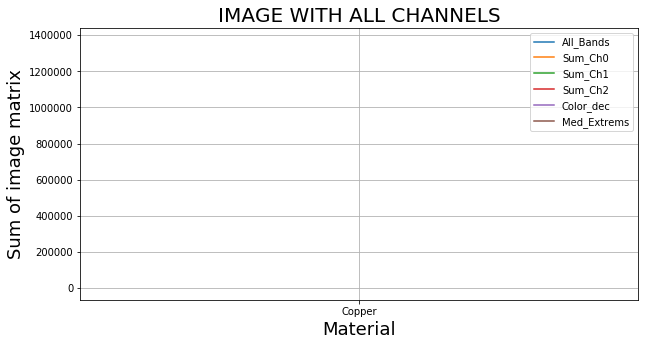

In [45]:
df_plot.plot(y=["All_Bands","Sum_Ch0","Sum_Ch1", "Sum_Ch2","Color_dec","Med_Extrems"],figsize=(10,5), grid=True )

# Obtain legend (xticks) for X axis
loc_Array_sum = np.arange(len(df_plot.index))
# Position of X labels
xtick_loc = list(loc_Array_sum)  
# Name of x labels
xticks = list(df_plot.Material)
#-------

#plt.plot(df_plot.Array_sum)
plt.title('IMAGE WITH ALL CHANNELS',fontsize=20)
plt.ylabel('Sum of image matrix',fontsize=18)
plt.xticks(xtick_loc, df_plot.Material, rotation=0)
plt.xlabel('Material',fontsize=18)
plt.show()

In [46]:
# Create pivot table
df_plot1 = df_plot.groupby('Material')['All_Bands', 'Sum_Ch0','Sum_Ch1','Sum_Ch2','Color_dec','Med_Extrems'].mean()
df_plot1

,All_Bands,Sum_Ch0,Sum_Ch1,Sum_Ch2,Color_dec,Med_Extrems
Material,,,,,,
Copper,3400.502407,3131.080699,3349.470157,3614.918847,2234.652,1.371667e+06


In [47]:
df = pd.DataFrame(df_plot1.All_Bands)   
color = ['red','blue','green','orange','cyan','black','yellow']

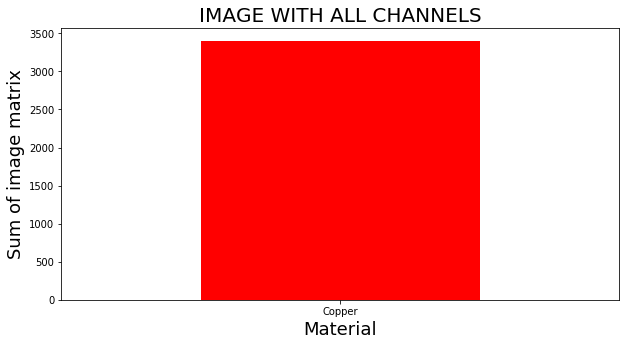

In [48]:
df.plot(kind='bar', y=0, color=color, legend=False, rot=0, figsize=(10,5))
plt.title('IMAGE WITH ALL CHANNELS',fontsize=20)
plt.xlabel('Material',fontsize=18)
plt.ylabel('Sum of image matrix',fontsize=18)
plt.show()

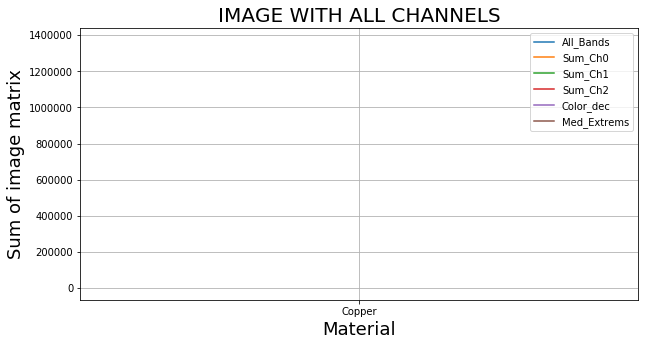

In [49]:
loc_Array_sum = np.arange(len(df_plot1.index))
xtick_loc = list(loc_Array_sum)  
xticks = list(df_plot1.index)

df_plot1.plot( y=["All_Bands","Sum_Ch0","Sum_Ch1", "Sum_Ch2","Color_dec","Med_Extrems"],figsize=(10,5), grid=True )
plt.xticks(xtick_loc, df_plot1.index, rotation=0)
plt.title('IMAGE WITH ALL CHANNELS',fontsize=20)
plt.xlabel('Material',fontsize=18)
plt.ylabel('Sum of image matrix',fontsize=18)
plt.show()

In [50]:
loc_Array_sum = np.arange(len(df_plot1.index))+0.1 # Offsetting the tick-label location
loc_r = np.arange(len(df_plot1.index))-0.1 # Offsetting the tick-label location
loc_g = np.arange(len(df_plot1.index))-0.3 # Offsetting the tick-label location
loc_b = np.arange(len(df_plot1.index))-0.5 # Offsetting the tick-label location

xtick_loc = list(loc_g)  
xticks = list(df_plot1.index)

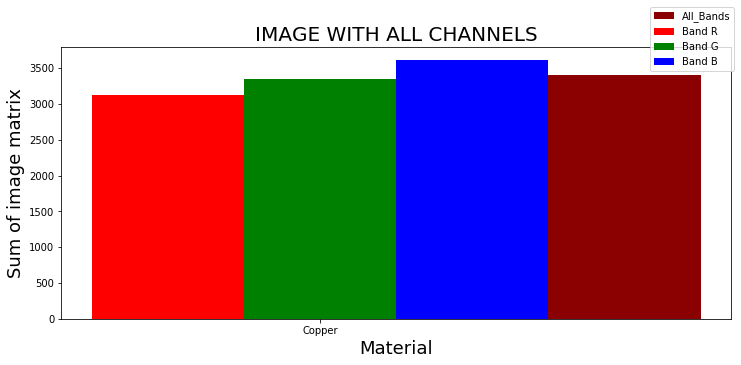

In [51]:
#Plot  Bar Graph
#df_plot1.plot(kind='bar', figsize=(12,5), grid=True, color='darkred',fontsize=18)
loc_Array_sum = np.arange(len(df_plot1.index))+0.1 # Offsetting the tick-label location
loc_b = np.arange(len(df_plot1.index))-0.1 # Offsetting the tick-label location
loc_g = np.arange(len(df_plot1.index))-0.3 # Offsetting the tick-label location
loc_r = np.arange(len(df_plot1.index))-0.5 # Offsetting the tick-label location

#xtick_loc = list(loc_Array_sum) + list(loc_r) + list(loc_g) + list(loc_b)
#xticks = list(selected.keys())+ list(rejected.keys())
colors = ['darkred','red','green','blue','orange','cyan','black','yellow']
plt.figure(figsize=(12,5))

plt.bar(loc_Array_sum, df_plot1.All_Bands, color=colors[0], width=0.2, label='All_Bands')
plt.bar(loc_r, df_plot1.Sum_Ch0, color=colors[1], width=0.2,label='Band R')
plt.bar(loc_g, df_plot1.Sum_Ch1, color=colors[2], width=0.2,label='Band G')
plt.bar(loc_b, df_plot1.Sum_Ch2, color=colors[3], width=0.2,label='Band B')

plt.title('IMAGE WITH ALL CHANNELS',fontsize=20)
plt.xlabel('Material',fontsize=18)
plt.ylabel('Sum of image matrix',fontsize=18)
plt.xticks(xtick_loc, xticks, rotation=0)
plt.legend(bbox_to_anchor=(.8,0.8),\
    bbox_transform=plt.gcf().transFigure)

plt.show()

<Figure size 432x288 with 0 Axes>

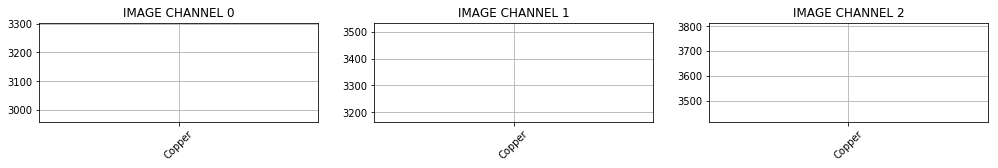

In [52]:
plt.figure(1)
plt.figure(figsize=(17, 4))
plt.tight_layout()
plt.subplot(231)
plt.title('IMAGE CHANNEL 0')
plt.xticks(rotation=45)
plt.grid(True)
plt.plot(df_plot1.Sum_Ch0, 'k--')

plt.subplot(232)
plt.title('IMAGE CHANNEL 1')
plt.xticks(rotation=45)
plt.grid(True)
plt.plot(df_plot1.Sum_Ch1,  'r--')

plt.subplot(233)
plt.title('IMAGE CHANNEL 2')
plt.xticks(rotation=45)
plt.plot(df_plot1.Sum_Ch2,  'g--')
plt.grid(True)
plt.show()

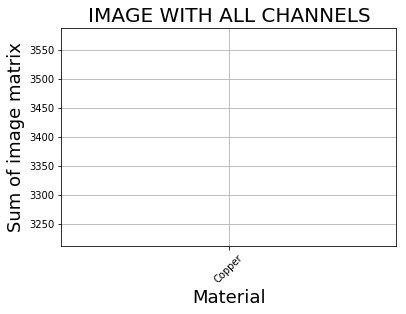

In [53]:
# Plot channel based
plt.plot(df_plot1.All_Bands)
plt.title('IMAGE WITH ALL CHANNELS',fontsize=20)
plt.xlabel('Material',fontsize=18)
plt.ylabel('Sum of image matrix',fontsize=18)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

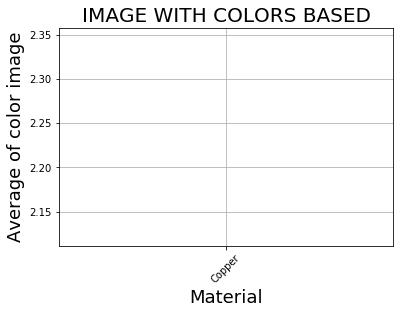

In [54]:
# Plot based on color
plt.plot(df_plot1.Color_dec/1000)
plt.title('IMAGE WITH COLORS BASED',fontsize=20)
plt.xlabel('Material',fontsize=18)
plt.ylabel('Average of color image',fontsize=18)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

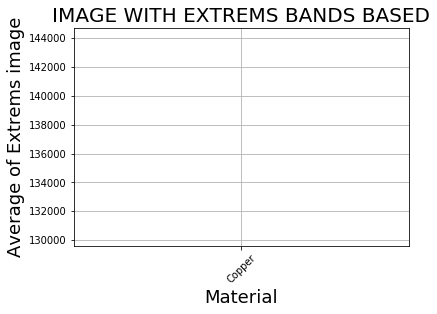

In [55]:
# Plot based on Extrems of the Bands
plt.plot(df_plot1.Med_Extrems/10)
plt.title('IMAGE WITH EXTREMS BANDS BASED',fontsize=20)
plt.xlabel('Material',fontsize=18)
plt.ylabel('Average of Extrems image',fontsize=18)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()